In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define Path and Read File

In [2]:
# File to load
file_to_load = Path("cleaned_files/merged_income_diet_final.csv")

In [3]:
# Read the data
income_diet_data = pd.read_csv(file_to_load)

# Show the data
income_diet_data

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
0,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,3.21,3.66
1,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7007,Cost of starchy staples,PPP dollar per person per day,0.54,0.57
2,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7008,Cost of animal source foods,PPP dollar per person per day,0.97,1.00
3,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7009,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,0.39
4,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7010,Cost of vegetables,PPP dollar per person per day,0.43,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,Uruguay,2017.0,4.760,38.898,6.158,10.718,15.432,22.22,45.47,20658.0,...,1.47008,Americas,Non-OECD,High income,234,7010,Cost of vegetables,PPP dollar per person per day,0.99,0.67
525,Uruguay,2017.0,4.760,38.898,6.158,10.718,15.432,22.22,45.47,20658.0,...,1.47008,Americas,Non-OECD,High income,234,7011,Cost of fruits,PPP dollar per person per day,0.54,0.81
526,Uruguay,2017.0,4.760,38.898,6.158,10.718,15.432,22.22,45.47,20658.0,...,1.47008,Americas,Non-OECD,High income,234,7012,Cost of oils and fats,PPP dollar per person per day,0.07,0.11
527,Uruguay,2017.0,4.760,38.898,6.158,10.718,15.432,22.22,45.47,20658.0,...,1.47008,Americas,Non-OECD,High income,234,7005,Percentage of the population unable to afford ...,%,31.10,37.80


# Filter the DataFrame for the Specific Items

In [4]:
# Filter the DataFrame for the Percentage unable to afford a healthy diet (%)
income_percentage_data = income_diet_data[income_diet_data['Item Code'] == 7005]
income_percentage_data.head()

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
7,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.40,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7005,Percentage of the population unable to afford ...,%,49.3,54.1
16,Austria,2017.0,41.906,27.90,8.50,14.20,18.00,22.70,36.60,45378.0,...,1.057751,Europe,OECD,High income,11,7005,Percentage of the population unable to afford ...,%,2.5,3.4
25,Belarus,2017.0,21.866,25.44,9.93,14.24,17.87,22.47,35.50,17281.0,...,1.114978,Europe,Non-OECD,Upper middle income,57,7005,Percentage of the population unable to afford ...,%,3.2,1.0
34,Belgium,2017.0,2.039,26.00,9.10,14.10,18.60,23.30,34.90,42614.0,...,1.274799,Europe,OECD,High income,255,7005,Percentage of the population unable to afford ...,%,2.1,0.8
43,Bhutan,2017.0,59.833,37.44,6.68,10.79,15.46,22.70,44.38,9247.0,...,0.000000,Asia,Non-OECD,Lower middle income,18,7005,Percentage of the population unable to afford ...,%,28.9,21.5


In [5]:
# Filter the DataFrame for the Cost of a healthy diet (PPP dollar per person per day)
healthy_diet_data = income_diet_data[income_diet_data['Item Code'] == 7004]
healthy_diet_data.head()

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
0,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.40,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,3.21,3.66
9,Austria,2017.0,41.906,27.90,8.50,14.20,18.00,22.70,36.60,45378.0,...,1.057751,Europe,OECD,High income,11,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,2.06,2.43
18,Belarus,2017.0,21.866,25.44,9.93,14.24,17.87,22.47,35.50,17281.0,...,1.114978,Europe,Non-OECD,Upper middle income,57,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,3.13,3.42
27,Belgium,2017.0,2.039,26.00,9.10,14.10,18.60,23.30,34.90,42614.0,...,1.274799,Europe,OECD,High income,255,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,2.00,2.32
36,Bhutan,2017.0,59.833,37.44,6.68,10.79,15.46,22.70,44.38,9247.0,...,0.000000,Asia,Non-OECD,Lower middle income,18,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,4.07,4.96


# Generate Scatter Plots and Perform Linear Regression

In [6]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values, title, x_label, y_label):

    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The r^2-value is: {r_value**2}")

    # Plot the data points and the linear regression model
    plt.scatter(x_values, y_values, label='Data Points')
    plt.plot(x_values, x_values * slope + intercept, 'r-', label='Fitted Line')

    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Format the equation string: y = mx + b
    line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
    
    # Display the equation on the plot
    plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', fontsize=15, color='red')

    # Show the plot
    plt.show()

The r^2-value is: 0.4808008340064871


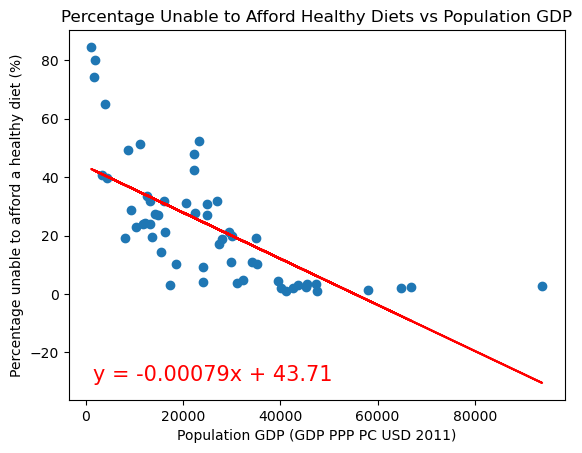

<Figure size 640x480 with 0 Axes>

In [7]:
# Drop NaN
data_cleaned_1 = income_percentage_data.dropna(subset=['pop_gdp', 'Y2017'])

# Linear regression on Percentage Unable to Afford Healthy Diets vs Population GDP
x_values = data_cleaned_1['pop_gdp']
y_values = data_cleaned_1['Y2017']
title = 'Percentage Unable to Afford Healthy Diets vs Population GDP'
x_label = 'Population GDP (GDP PPP PC USD 2011)'
y_label = 'Percentage unable to afford a healthy diet (%)'
linear_reg_plot(x_values, y_values, title, x_label, y_label)

# Save the figure
plt.savefig("Output/Reg_Percentage_Unable_To_Afford_vs_Pop_GDP.png")

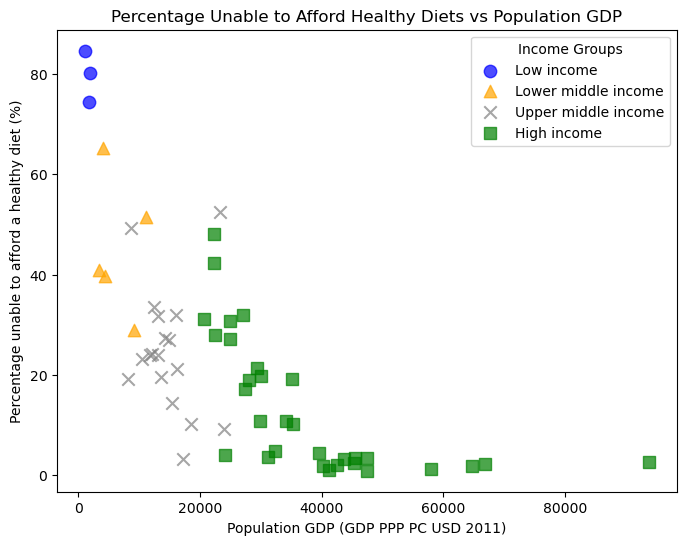

In [8]:
# Get the global income levels and percentage unable to afford a healthy diet
global_income = income_percentage_data['pop_gdp']
unable_afford = income_percentage_data['Y2017']
income_categories = income_percentage_data['incomegroup']

# Define markers and colors for different income levels
markers = {
    'Low income': 'o',  # Dot
    'Lower middle income': '^', # Triangle
    'Upper middle income': 'x', # Cross
    'High income': 's'  # Square
}
colors = {
    'Low income': 'blue',
    'Lower middle income': 'orange',
    'Upper middle income': 'grey',
    'High income': 'green'
}

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot where the points are grouped by income groups
for income_level in markers.keys():
    mask = income_categories == income_level
    plt.scatter(global_income[mask], unable_afford[mask], 
                label=income_level, 
                marker=markers[income_level], 
                color=colors[income_level],
                s = 80,
                alpha = 0.7
                )

# Add titel, labels, and legend
plt.title('Percentage Unable to Afford Healthy Diets vs Population GDP')
plt.xlabel('Population GDP (GDP PPP PC USD 2011)')
plt.ylabel('Percentage unable to afford a healthy diet (%)')
plt.legend(title = 'Income Groups')

# Save the figure
plt.savefig("Output/Percentage_Unable_To_Afford_vs_Pop_GDP.png")

# Display the plot
plt.show()

**Analysis:** 
- The r^2 value of 0.481 indicates there is a moderate correlation between the percentage of the population unable to afford a healthy diet and the population's GDP.
- The scatter plot with markers for the different income groups shows that, as the population's GDP increases, the percentage of the population unable to afford healthy diets decreases. More people can afford healthy diets in high-income countries.

The r^2-value is: 0.27725761358574513


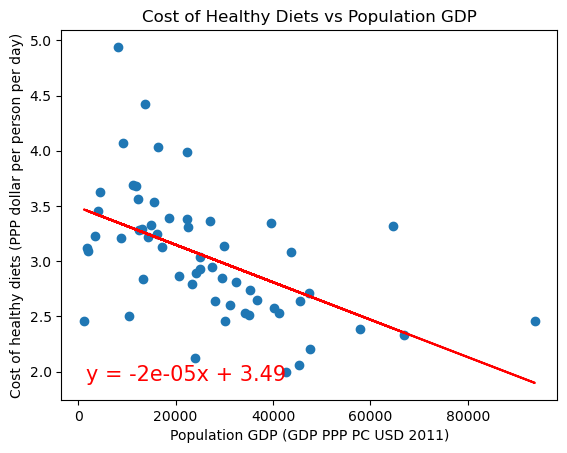

<Figure size 640x480 with 0 Axes>

In [9]:
# Drop NaN
data_cleaned_2 = healthy_diet_data.dropna(subset=['pop_gdp', 'Y2017'])

# Linear regression on Cost of Healthy Diets vs Population GDP
x_values = data_cleaned_2['pop_gdp']
y_values = data_cleaned_2['Y2017']
title = 'Cost of Healthy Diets vs Population GDP'
x_label = 'Population GDP (GDP PPP PC USD 2011)'
y_label = 'Cost of healthy diets (PPP dollar per person per day)'
linear_reg_plot(x_values, y_values, title, x_label, y_label)

# Save the figure
plt.savefig("Output/Reg_Cost_of_Healthy_Diets_vs_Pop_GDP.png")

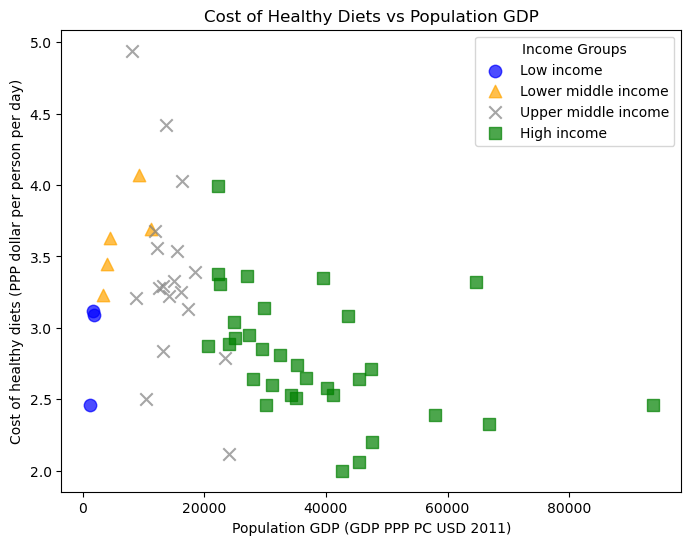

In [10]:
# Get the global income levels and cost of healthy diets
global_income = healthy_diet_data['pop_gdp']
healthy_diets = healthy_diet_data['Y2017']
income_categories = healthy_diet_data['incomegroup']

# Define markers and colors for different income levels
markers = {
    'Low income': 'o',  # Dot
    'Lower middle income': '^', # Triangle
    'Upper middle income': 'x', # Cross
    'High income': 's'  # Square
}
colors = {
    'Low income': 'blue',
    'Lower middle income': 'orange',
    'Upper middle income': 'grey',
    'High income': 'green'
}

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot where the points are grouped by income groups
for income_level in markers.keys():
    mask = income_categories == income_level
    plt.scatter(global_income[mask], healthy_diets[mask], 
                label=income_level, 
                marker=markers[income_level], 
                color=colors[income_level],
                s = 80,
                alpha = 0.7
                )

# Add title, labels, and legend
plt.title('Cost of Healthy Diets vs Population GDP')
plt.xlabel('Population GDP (GDP PPP PC USD 2011)')
plt.ylabel('Cost of healthy diets (PPP dollar per person per day)')
plt.legend(title = 'Income Groups')

# Save the figure
plt.savefig("Output/Cost_of_Healthy_Diets_vs_Pop_GDP.png")

# Display the plot
plt.show()

**Analysis for Cost of Healthy Diets vs Population GDP:** 
- The r^2 value of 0.277 indicates weak to no correlation between the cost of healthy diets and population GDP.
- The last scatter plot with markers for the different income groups shows that, as the population's GDP increases, the cost of healthy diets tends to be a relatively smaller part of people’s income in high-income countries. The spread of the cost is the greatest among upper-middle-income countries.